# Classification of breast cancer data  [35 points]

You will implement a Support Vector Machine (SVM) model for the classification of breast cancer data and compare its performance with K-nearest Neighbors.

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
## loading the raw data using pandas
bc= pd.read_csv('data.csv')
bc.head()
diagnosis = bc.diagnosis

#### Pre-process and understand data (5 pts)

The data label is the diagnosis (M = malignant, B = benign).

**Question (2pts):** Convert diagnosis column to binary 0-1 label where 1 incidates malignancy.

In [15]:
## convert diagnosis to numerical label (M = malignant, B = benign)
cleanup_nums = {"diagnosis":     {"M": 1, "B": 0}}
tmp = bc.replace(cleanup_nums)
y = pd.DataFrame(tmp['diagnosis'])# response variable
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


**Question (3pts):** Plot the first 2 features against diagnosis. Is the data linearly separable and what happens if we fit a hard-margin SVM to the data?

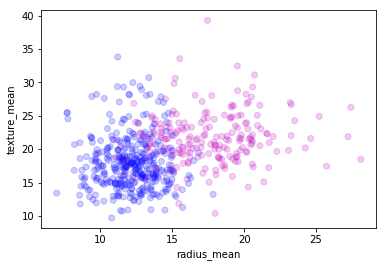

In [17]:
plt.scatter(bc['radius_mean'], bc['texture_mean'], alpha=0.2,
            c=bc.diagnosis, cmap='viridis')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean');

**The data is not linearly separable. If we fit a hard-margin SVM, there will be no solution as we cannot solve this optimization problem by letting training error to be zero. **

#### Splitting the data: training and test 

In [18]:
bc = bc.drop(columns='Unnamed: 32')
bc = bc.drop(columns=['diagnosis'])
bc = bc.drop(columns=['id'])
bc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
from sklearn.model_selection import train_test_split
X = bc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1. Support Vector Machine (SVM) (20 pts)

**Question (15pts):** Train and test a SVM model with the following requirements:
- Use GridSearchCV to find the best combination of model hyper-parameters: kernel: {linear, rbf}; for both kernel, C:{1, 10, 100, 1000}; for rbf kernel 'gamma' = {1e-3, 1e-4, 1e-5}.
- Try both accuracy and recall metric as scoring function in GridSearchCV
- Report the best hyper-parameter setting for each metric
- Report and plot the confusion matrix of the best estimator for each metric

# Tuning hyper-parameters for recall


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

# Tuning hyper-parameters for accuracy


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}



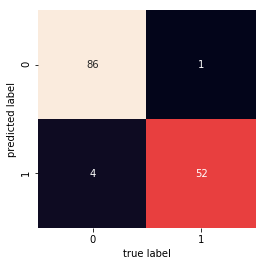

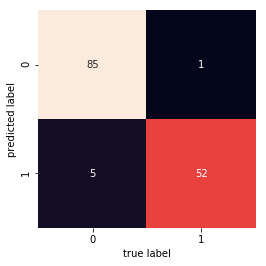

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['recall', 'accuracy']
for sc in scores:
    grid=GridSearchCV(svc, param_grid, cv=5, scoring=sc, n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)

    grid.fit(X_train,y_train)
    svc = grid.best_estimator_ 

    print("Best parameters set found on development set:")
    print()
    print(grid.best_params_)
    print()
    y_pred_svc = svc.predict(X_test)
    ## computing and plotting confusion matrix
    mat = confusion_matrix(y_test, y_pred_svc)
    plt.figure()
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

**Question (5pts):** Fit an SVM model to a slice of data that contains only the first 2 features and visualize decision boudary based on these two features.

In [23]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=3, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [36]:
X_svc = pd.DataFrame([bc['radius_mean'],bc['texture_mean']]).T

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


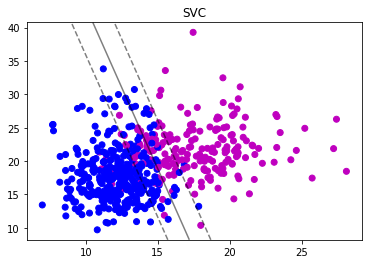

In [40]:
## for display purposes, we fit the model on the first two features
svc.fit(X_svc, y)

## Plotting the decision boundary for all data (both train and test)
plt.scatter(bc.radius_mean, bc.texture_mean, c=diagnosis, cmap='viridis')
plot_svc_decision_function(svc);

plt.title('SVC')
plt.show()

### 2. K-nearest Neighbors classifier (10pts)

**Question:** Repeat all the tasks for SVM to train a kNN classifier where the hyper-parameter is only k (number of neighbors) ranging from 1 to 50 in kNN. Compare the results with those of SVM, which classifier gives better results?

# The hyper-parameters is {'n_neighbors': 5}
# The hyper-parameters is {'n_neighbors': 5}


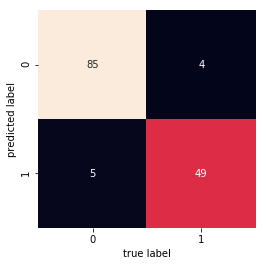

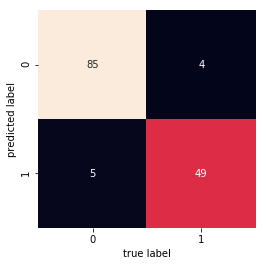

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
knn=KNeighborsClassifier()

k_range=np.arange(1, 51, 1)
param_grid=dict(n_neighbors=k_range)
scores = ['recall', 'accuracy']
for sc in scores:
    grid_knn=GridSearchCV(knn, param_grid, scoring=sc)
    
    grid_knn.fit(X_train,y_train)
    print("# The hyper-parameters is %s" % str(grid_knn.best_params_))
    knn = KNeighborsClassifier(n_neighbors=grid_knn.best_estimator_.n_neighbors)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    ## computing and plotting confusion matrix
    mat_knn = confusion_matrix(y_test, y_pred_knn)    
    plt.figure()
    sns.heatmap(mat_knn.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

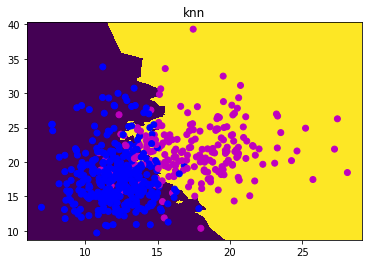

In [56]:
## Plotting the decision boundary for all data (both train and test)
h = 0.02
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X.values[:, 0], X.values[:, 1], c=diagnosis)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('knn')

plt.show()